## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [5]:
import psycopg2
import pandas as pd


pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)


In [6]:
sql_str = "SELECT * FROM exploratory;"

df = pd.read_sql_query(sql_str, conn)
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной.

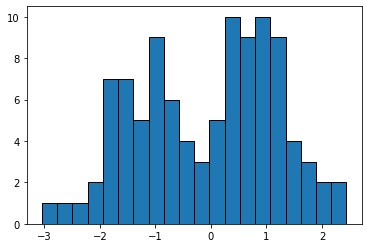

In [224]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

register_matplotlib_converters()

arr = (df[df.columns[0]].astype(float)).values

fig, subplot = plt.subplots()

subplot.hist(
    arr, bins=20, histtype='bar',
    align='mid', orientation='vertical',ec='black'
)

plt.show()

Переменная feature_1: Похоже на бимодальное распределение без выбросов

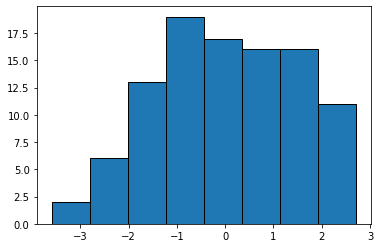

In [189]:
arr = (df[df.columns[1]].astype(float)).values

fig, subplot = plt.subplots()

subplot.hist(
    arr, bins=8, histtype='bar',
    align='mid', orientation='vertical',ec='black'
)

plt.show()

Переменная feature_2: нормальное распределение, без выбросов

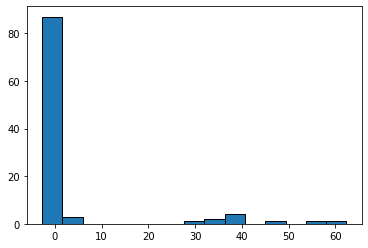

In [217]:
arr = (df[df.columns[2]].astype(float)).values

fig, subplot = plt.subplots()

subplot.hist(
    arr, bins=15, histtype='bar',
    align='mid', orientation='vertical',ec='black'
)

plt.show()

Переменная feature_3: Почти все значния находятся около нуля, есть выбросы.

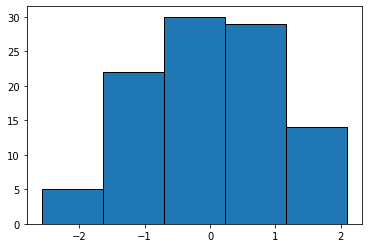

In [225]:
arr = (df[df.columns[3]].astype(float)).values

fig, subplot = plt.subplots()

subplot.hist(
    arr, bins=5, histtype='bar',
    align='mid', orientation='vertical',ec='black'
)

plt.show()

Переменная feature_4: нормальное распределение без выбросов

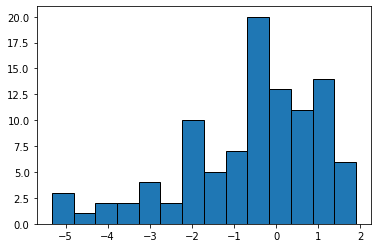

In [235]:
arr = (df[df.columns[4]].astype(float)).values

fig, subplot = plt.subplots()

subplot.hist(
    arr, bins=14, histtype='bar',
    align='mid', orientation='vertical',ec='black'
)

plt.show()

Переменная feature_5 - Унимодельное распределение с ассиметрией

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

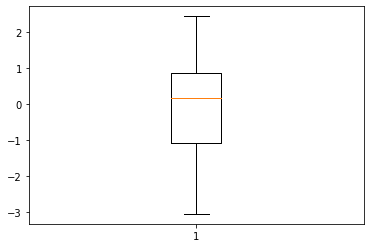

In [41]:
df['feature_1'] = df['feature_1'].astype(float)

fig, subplot = plt.subplots()

subplot.boxplot(df['feature_1'].values, meanline=True)

plt.show()

Данные нормально распределены, выбросов нет

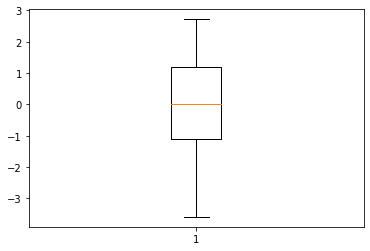

In [42]:


df['feature_2'] = df['feature_2'].astype(float)

fig, subplot = plt.subplots()

subplot.boxplot(df['feature_2'].values, meanline=True)

plt.show()


In [ ]:
Данные нормально распределены, выбросов нет

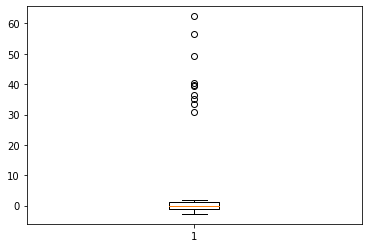

In [43]:
df['feature_3'] = df['feature_3'].astype(float)

fig, subplot = plt.subplots()

subplot.boxplot(df['feature_3'].values, meanline=True)

plt.show()

In [ ]:
Данные нормально распределены, есть несколько выбросов

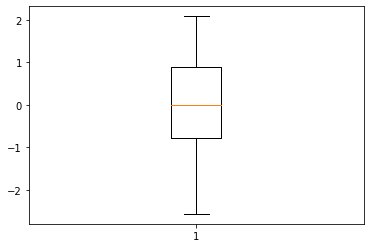

In [44]:
df['feature_4'] = df['feature_4'].astype(float)

fig, subplot = plt.subplots()

subplot.boxplot(df['feature_4'].values, meanline=True)

plt.show()

In [ ]:
Данные нормально распределены, выбросов нет

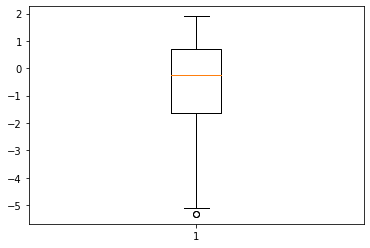

In [45]:
df['feature_5'] = df['feature_5'].astype(float)

fig, subplot = plt.subplots()

subplot.boxplot(df['feature_5'].values, meanline=True)

plt.show()

In [ ]:
Данные нормально распределены, есть один выброс

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

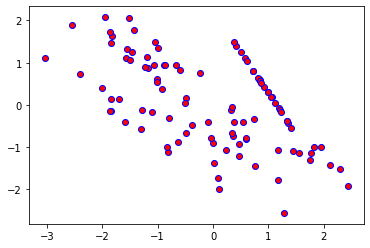

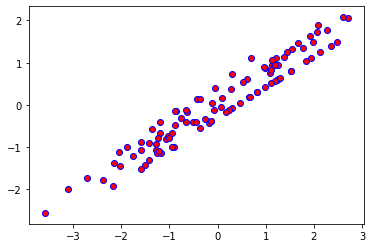

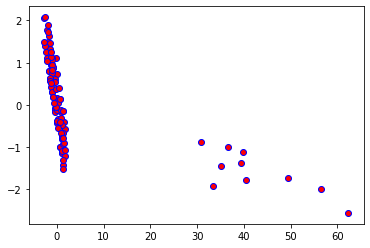

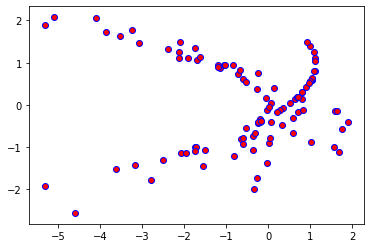

In [37]:
for col in df.columns: 
    if col != 'feature_4':
    
        df[col] = df[col].astype(float)

        fig, subplot = plt.subplots()

        subplot.scatter(
             df[col], y= df['feature_4'], 
            marker='o', c='r', edgecolor='b'
        )


plt.show()


Имеет смысл включить feature1 и feature2, т.к. видна линейная зависимость